In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

### The Home credit data corresponds to the loan provided to customers. The given data has spread across 7 different files linked with common key.  For the given applicant data we need to predict if they are capable to repay the loan or not.

### Below Picture represents the how data is related

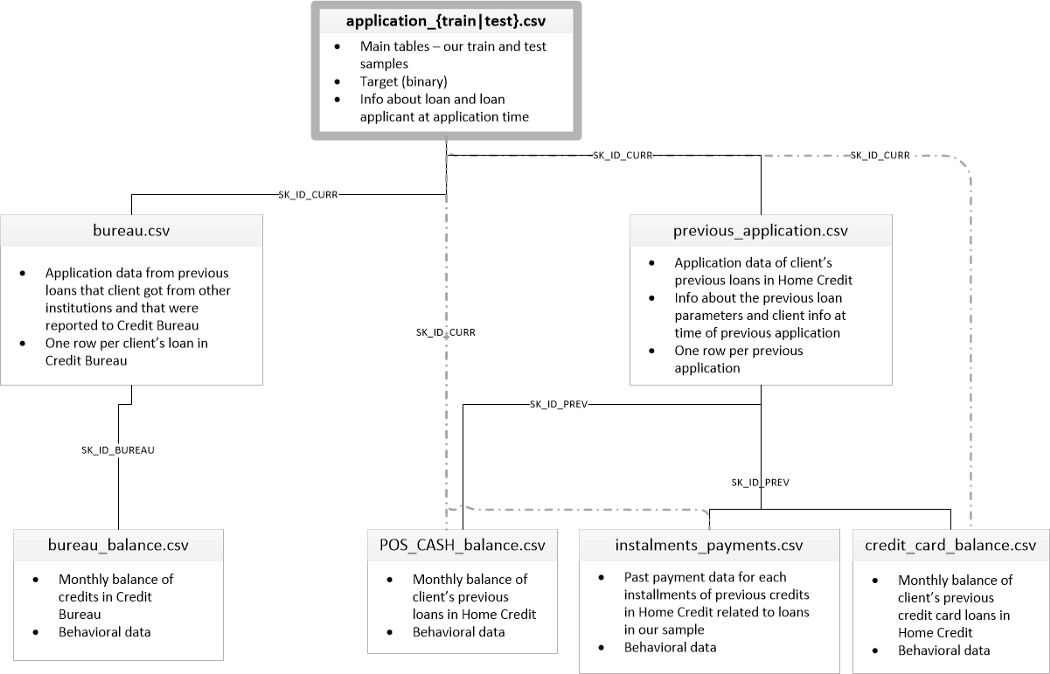

## Reading Application Data

In [3]:
application = pd.read_csv('application_train.csv')
application.shape    #Check the shape of the datset

(307511, 122)

In [4]:
application.head(20)   #List top 20 records

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0        121500.000    513000.0      21865.5   
5                Y             0         99000.000    490495.5      27517.5   
6                Y             1        171000.000   1560726.0      41301.0   
7                Y             0        360000.000   1530000.0      42075.0   
8                Y             0        112500.000   1019610.0      33826.5   
9                Y             0        135000.000    405000.0      20250.0   
10               Y             1        112500.000    652500.0      21177.0   
11               Y             0         38419.155    148365.0      10678.5   
12               Y             0         67500.000     80865.0       5881.5   
13               N             1        225000.000    918468.0      28966.5   
14               Y             0        189000.000    773680.5      32778.0   
15               Y             0        157500.000    299772.0      20160.0   
16               N             0        108000.000    509602.5      26149.5   
17               Y             1         81000.000    270000.0      13500.0   
18               Y             0        112500.000    157500.0       7875.0   
19               Y             1         90000.000    544491.0      17563.5   

    ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0   ...                 0                0                0                0   
1   ...                 0                0                0                0   
2   ...                 0                0                0                0   
3   ...                 0                0                0                0   
4   ...                 0                0                0                0   
5   ...                 0                0                0                0   
6   ...                 0                0                0                0   
7   ...                 0                0                0                0   
8   ...                 0                0                0                0   
9   ...                 0                0                0              

#### There are 307511 rows with 122 columns. TARGET is the dependent variable having two classes of values 0 and 1 for Loan repaid or not repaid respectively 

In [5]:
# Checking for null values
application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#### There are lot of missing values as we observe. We need to handle all these missing values later

In [6]:
# Check for duplicate data
duplicate = application[application.duplicated(keep = 'first')]  #Check for row duplicates

In [7]:
duplicate  # No duplicates

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

[0 rows x 122 columns]

### Count plot for TARGET variable

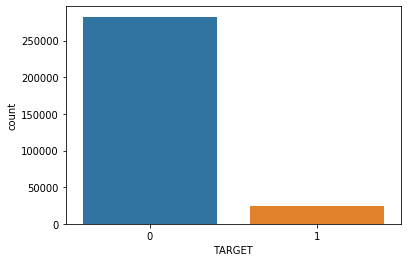

In [8]:
sb.countplot(application['TARGET'])

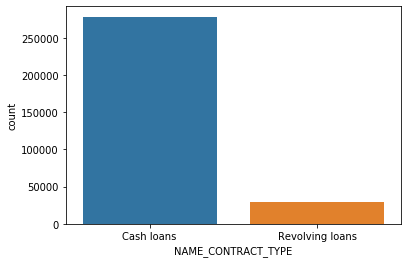

In [9]:
sb.countplot(application['NAME_CONTRACT_TYPE'])

In [10]:
contract_val = application['NAME_CONTRACT_TYPE'].value_counts()

In [11]:
contract_val

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [12]:
contract_df = pd.DataFrame({'labels': contract_val.index,'values': contract_val.values})

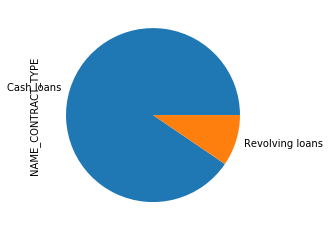

In [13]:
contract_val.plot(kind='pie')

In [14]:
import cufflinks as cf
cf.go_offline()
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [15]:
contract_val = application['NAME_CONTRACT_TYPE'].value_counts()
contract_df = pd.DataFrame({'labels': contract_val.index,
                   'values': contract_val.values
                  })
contract_df.iplot(kind='pie',labels='labels',values='values', title='Types of Loan', hole = 0.6)

### Cash loans are recorded more than revolving loans

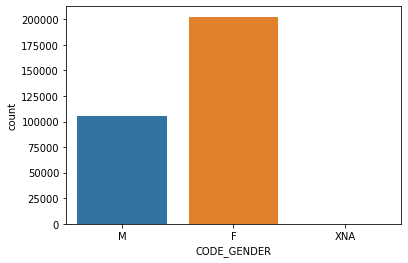

In [16]:
sb.countplot(application['CODE_GENDER'])

### We can differentiate the no of loans taken based on gender

In [17]:
application.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [18]:
application[application['AMT_INCOME_TOTAL'] < 2000000]['AMT_INCOME_TOTAL'].iplot(kind='histogram', bins=100,
   xTitle = 'Total Income', yTitle ='Count of applicants',
             title='Distribution of AMT_INCOME_TOTAL')

In [19]:
cf.set_config_file(theme='polar')
contract_val = application['TARGET'].value_counts()
contract_df = pd.DataFrame({'labels': contract_val.index,
                   'values': contract_val.values
                  })
contract_df.iplot(kind='pie',labels='labels',values='values', title='Loan Repayed or not', hole = 0.6)

## The data is imbalanced (91.9%(Loan repayed-0) and 8.07%(Loan not repayed-1)) and we need to handle this problem.

In [20]:
# Reading the bureau.csv data
bureau = pd.read_csv('bureau.csv')
print(bureau.shape)
bureau.head()

(1716428, 17)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [21]:
# CHeck for Null Values
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [22]:
# Check for duplicate data
duplicate = bureau[bureau.duplicated(keep = 'first')]

In [23]:
duplicate

Empty DataFrame
Columns: [SK_ID_CURR, SK_ID_BUREAU, CREDIT_ACTIVE, CREDIT_CURRENCY, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, AMT_CREDIT_MAX_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_TYPE, DAYS_CREDIT_UPDATE, AMT_ANNUITY]
Index: []

In [28]:
#Merge application.csv and bureau.csv using common key
application_bureau = application.merge(bureau, on='SK_ID_CURR', how='inner')

In [29]:
application_bureau.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100002       1         Cash loans           M            N   
2       100002       1         Cash loans           M            N   
3       100002       1         Cash loans           M            N   
4       100002       1         Cash loans           M            N   
5       100002       1         Cash loans           M            N   
6       100002       1         Cash loans           M            N   
7       100002       1         Cash loans           M            N   
8       100003       0         Cash loans           F            N   
9       100003       0         Cash loans           F            N   
10      100003       0         Cash loans           F            N   
11      100003       0         Cash loans           F            N   
12      100004       0    Revolving loans           M            Y   
13      100004       0    Revolving loans           M            Y   
14      100007       0         Cash loans           M            N   
15      100008       0         Cash loans           M            N   
16      100008       0         Cash loans           M            N   
17      100008       0         Cash loans           M            N   
18      100009       0         Cash loans           F            Y   
19      100009       0         Cash loans           F            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_x  \
0                Y             0          202500.0    406597.5        24700.5   
1                Y             0          202500.0    406597.5        24700.5   
2                Y             0          202500.0    406597.5        24700.5   
3                Y             0          202500.0    406597.5        24700.5   
4                Y             0          202500.0    406597.5        24700.5   
5                Y             0          202500.0    406597.5        24700.5   
6                Y             0          202500.0    406597.5        24700.5   
7                Y             0          202500.0    406597.5        24700.5   
8                N             0          270000.0   1293502.5        35698.5   
9                N             0          270000.0   1293502.5        35698.5   
10               N             0          270000.0   1293502.5        35698.5   
11               N             0          270000.0   1293502.5        35698.5   
12               Y             0           67500.0    135000.0         6750.0   
13               Y             0           67500.0    135000.0         6750.0   
14               Y             0          121500.0    513000.0        21865.5   
15               Y             0           99000.0    490495.5        27517.5   
16               Y             0           99000.0    490495.5        27517.5   
17               Y             0           99000.0    490495.5        27517.5   
18               Y             1          171000.0   1560726.0        41301.0   
19               Y             1          171000.0   1560726.0        41301.0   

    ...  DAYS_ENDDATE_FACT AMT_CREDIT_MAX_OVERDUE CNT_CREDIT_PROLONG  \
0   ...            -1038.0                    NaN                  0   
1   ...              -48.0                    NaN                  0   
2   ...            -1185.0                  0.000                  0   
3   ...             -911.0               3321.000                  0   
4   ...              -36.0               5043.645                  0   
5   ...                NaN                 40.500                  0   
6   ...                NaN                    NaN                  0   
7   ...             -967.0                  0.000                  0   
8   ...            -2131.0                  0.000                  0   
9   ...             -540.0                  0.000                  0   
10  ...             -621.0             

In [30]:
application_bureau.shape

(1465325, 138)